In [6]:
import folium
import geopandas
import pandas as pd
from geopy.distance import geodesic
import time
import matplotlib.pyplot as plt

In [7]:
# Data load
DATA_URL = '../Data/20230327.parquet'
df = pd.read_parquet(path=DATA_URL, engine= "pyarrow")


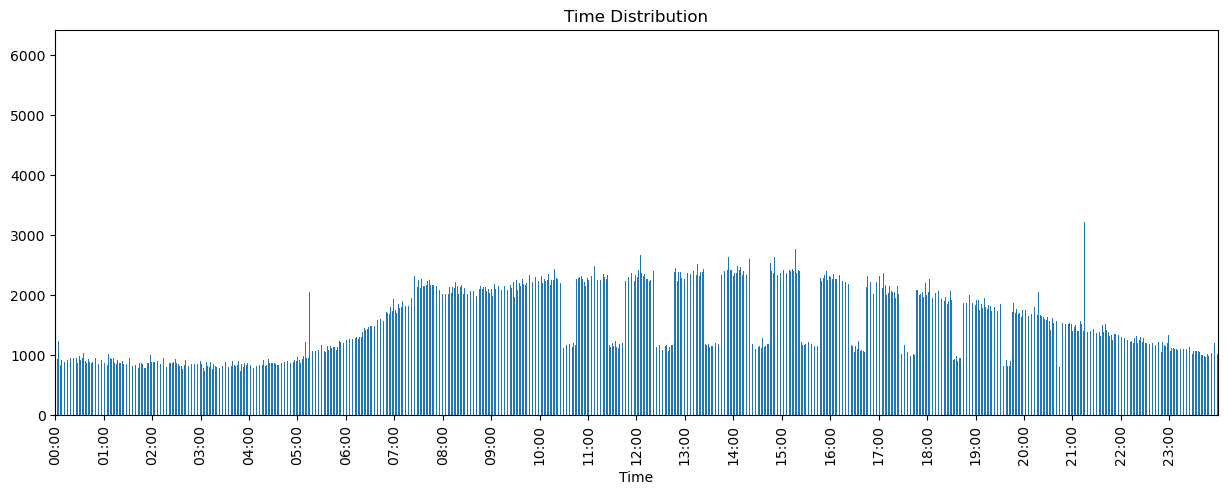

In [9]:
# Data distrubutions
# Show 'time' distribution
time_distribution = df['time'].value_counts().sort_index()

# Plot the distribution
time_distribution.plot(kind='bar', figsize=(15, 5), title='Time Distribution')
plt.xlabel('Time')
plt.xticks(ticks=range(0, len(time_distribution), 3600), labels=[f'{i:02}:00' for i in range(24)])
plt.show()

In [20]:
# Do a quick test on one user only
device_id = '657192d6fb7684195ed9918cafc556bccb77df641ecba8633e8e22c9b87122d2'

subset_data = df[df['deviceid'] == device_id]

In [ ]:
from geopy.distance import geodesic

# Calculate distances and create a path

# Ensure subset_data is sorted by time
subset_data = subset_data.sort_values(by='time')

# Calculate distances between consecutive points
distances = []
coordinates = list(zip(subset_data['lat'], subset_data['lon']))

for i in range(1, len(coordinates)):
    distances.append(geodesic(coordinates[i - 1], coordinates[i]).meters)

# Add distances to the dataframe
subset_data['distance'] = [0] + distances  # First point has no distance

# Create a path as a list of coordinates
subset_data['path'] = subset_data.apply(lambda row: (row['lat'], row['lon']), axis=1)

# Save the result in a new dataframe
path_df = subset_data[['time', 'lat', 'lon', 'distance', 'path']].reset_index(drop=True)
print(path_df)



         time        lat       lon      distance  \
0    00:21:05  46.074120  14.46000      0.000000   
1    00:23:14  46.074120  14.46000      0.000000   
2    00:23:17  45.963020  14.57827  15374.419144   
3    00:23:28  46.074120  14.46000  15374.419144   
4    00:24:32  45.963020  14.57827  15374.419144   
..        ...        ...       ...           ...   
405  23:47:49  46.074039  14.46847      0.000000   
406  23:50:25  46.074039  14.46847      0.000000   
407  23:53:14  46.072781  14.46785    147.914149   
408  23:56:15  45.963020  14.57827  14898.196968   
409  23:56:18  46.074120  14.46000  15374.419144   

                                         path  
0    (46.074119567871094, 14.460000038146973)  
1    (46.074119567871094, 14.460000038146973)  
2     (45.96302032470703, 14.578269958496094)  
3    (46.074119567871094, 14.460000038146973)  
4     (45.96302032470703, 14.578269958496094)  
..                                        ...  
405  (46.074039459228516, 14.4684696197

       time       lat       lon      distance  \
0  00:21:05  46.07412  14.46000      0.000000   
1  00:23:14  46.07412  14.46000      0.000000   
2  00:23:17  45.96302  14.57827  15374.419144   
3  00:23:28  46.07412  14.46000  15374.419144   
4  00:24:32  45.96302  14.57827  15374.419144   

                                       path  
0  (46.074119567871094, 14.460000038146973)  
1  (46.074119567871094, 14.460000038146973)  
2   (45.96302032470703, 14.578269958496094)  
3  (46.074119567871094, 14.460000038146973)  
4   (45.96302032470703, 14.578269958496094)  


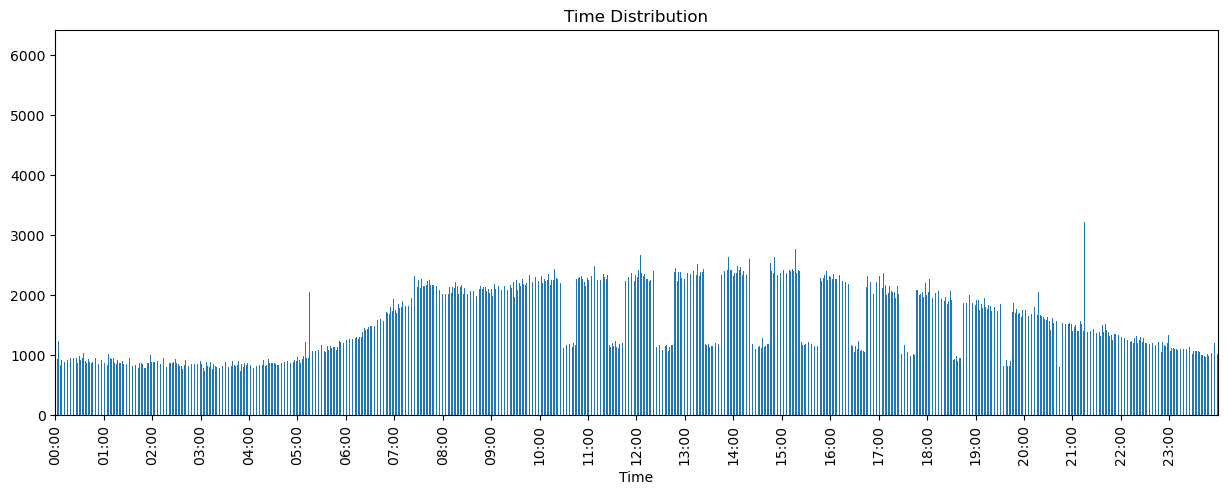

In [27]:
print(path_df.head(5))
# Calculate the time distribution for subset_data
subset_time_distribution = path_df['time'].value_counts().sort_index()

# Plot the distribution
time_distribution.plot(kind='bar', figsize=(15, 5), title='Time Distribution')
plt.xlabel('Time')
plt.xticks(ticks=range(0, len(time_distribution), 3600), labels=[f'{i:02}:00' for i in range(24)])
plt.show()

We see that the data is distributed well, there is some outliers (21:15?) but it shouldnt matter that much, there are no blind spots and most times have 1000+ occurances
